<a href="https://colab.research.google.com/github/CRekkaran/Instant-Background/blob/master/EMOTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!mkdir /root/.kaggle

In [4]:
# !rm /root/.kaggle/kaggle.json
!echo '{"username":"crekkt","key":"20605e97f88baa2a583401d4d07f2840"}' > /root/.kaggle/kaggle.json
!cat /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

{"username":"crekkt","key":"20605e97f88baa2a583401d4d07f2840"}


In [5]:
!kaggle datasets download -d almashalam/imagedataset

100% 236M/237M [00:05<00:00, 50.9MB/s]
100% 237M/237M [00:05<00:00, 45.0MB/s]


In [6]:
!unzip imagedataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: image-dataset/emotion/neutral/George_W_Bush_0501.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0502.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0504.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0505.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0508.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0512.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0513.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0515.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0516.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0517.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0518.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0519.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0521.jpg  
  inflating: image-dataset/emotion/neutral/George_W_Bush_0522.jpg

In [0]:
import numpy as np
import random
import cv2
from os import listdir
import os
import matplotlib.pyplot as plt
import pandas as pd
from os.path import isfile, join

In [8]:
emotedirs = os.listdir('/content/image-dataset/emotion')
df = pd.read_csv('/content/image-dataset/legend.csv')
df['emotion'] = [x.lower() for x in df['emotion']]
# df['emotion'] = df['emotion'].replace({'anger': 0, 'surprise': 1, 'disgust': 2, 'fear': 3, 'neutral': 4, 'happiness': 5,
#        'sadness': 6, 'contempt': 7})
del df['user.id']
df

,image,emotion
0,facial-expressions_2868588k.jpg,anger
1,facial-expressions_2868585k.jpg,surprise
2,facial-expressions_2868584k.jpg,disgust
3,facial-expressions_2868582k.jpg,fear
4,Aaron_Eckhart_0001.jpg,neutral
...,...,...
13685,SharmilaTagore_80.jpg,happiness
13686,SharmilaTagore_81.jpg,happiness
13687,SharmilaTagore_82.jpg,happiness
13688,SharmilaTagore_83.jpg,happiness


In [0]:
!mv ./image-dataset/emotion/anger/*.jpg ./image-dataset/emotion
!mv ./image-dataset/emotion/contempt/*.jpg ./image-dataset/emotion
!mv ./image-dataset/emotion/disgust/*.jpg ./image-dataset/emotion
!mv ./image-dataset/emotion/fear/*.jpg ./image-dataset/emotion
!mv ./image-dataset/emotion/happiness/*.jpg ./image-dataset/emotion
!mv ./image-dataset/emotion/neutral/*.jpg ./image-dataset/emotion
!mv ./image-dataset/emotion/sadness/*.jpg ./image-dataset/emotion
!mv ./image-dataset/emotion/surprise/*.jpg ./image-dataset/emotion

In [0]:
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [18]:
tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [0]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

batch_size = 64

In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

print(model.summary())

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/t

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=41)

In [25]:
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
print(train_df)
print(validate_df)

                            image    emotion
0          Zhang_Wenkang_0002.jpg  happiness
1            Byron_Scott_0002.jpg    neutral
2             Tony_Blair_0012.jpg    neutral
3      Silvio_Berlusconi_0026.jpg  happiness
4      Gerhard_Schroeder_0002.jpg  happiness
...                           ...        ...
10947         Hugo_Conte_0001.jpg  happiness
10948      George_W_Bush_0268.jpg    neutral
10949         Trent_Lott_0016.jpg    neutral
10950       Arturo_Gatti_0001.jpg    neutral
10951         Chris_Bell_0002.jpg    sadness

[10952 rows x 2 columns]
                            image    emotion
0             Tony_Blair_0035.jpg  happiness
1          George_W_Bush_0192.jpg    neutral
2          Javier_Solana_0008.jpg  happiness
3        Antonio_Palocci_0008.jpg  happiness
4       Heather_Locklear_0001.jpg  happiness
...                           ...        ...
2733  Queen_Elizabeth_II_0002.jpg    neutral
2734     Margaret_Hasley_0001.jpg    neutral
2735    Ludivine_Sagnier_0002

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [27]:
# Train ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    # width_shift_range=0.1,
    # height_shift_range=0.1
)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "./image-dataset/emotion/",
    x_col='image',
    y_col='emotion',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 10952 validated image filenames belonging to 8 classes.


In [28]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "./image-dataset/emotion/",
    x_col='image',
    y_col='emotion',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2738 validated image filenames belonging to 8 classes.


In [29]:
epochs = 3 if FAST_RUN else 30
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/30
Executing op __inference_keras_scratch_graph_1077 in device /job:localhost/replica:0/task:0/device:GPU:0
171/171 [==============================] - 65s 382ms/step - loss: 1.1862 - accuracy: 0.5145 - val_loss: 0.9719 - val_accuracy: 0.7061
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 2/30
171/171 [==============================] - 63s 367ms/step - loss: 0.8859 - accuracy: 0.6471 - val_loss: 0.6829 - val_accuracy: 0.7651
Epoch 3/30
171/171 [==============================] - 63s 367ms/step - loss: 0.7921 - accuracy: 0.7102 - val_loss: 0.7121 - val_accuracy: 0.7614
Epoch 4/30
171/171 [==============================] - 63s 366ms/step - loss: 0.7466 - accuracy: 0.7305 - val_loss: 0.7244 - val_accuracy: 0.7906
Epoch 5/30
171/171 [==============================] - 63s 366ms/step - loss: 0.7110 - accuracy: 0.7391 - val_loss: 0.7114 - val_accuracy: 0.7958
Epoch 6/30

In [31]:
history.history

{'accuracy': [0.5145114,
  0.64711255,
  0.7102105,
  0.730529,
  0.73907053,
  0.75220424,
  0.7643277,
  0.76304185,
  0.7840742,
  0.7934423,
  0.79390156,
  0.8045555,
  0.8033615,
  0.81447464,
  0.8124541,
  0.8205364,
  0.82365906,
  0.8208119,
  0.82384276,
  0.8262307,
  0.8249449,
  0.8229243,
  0.8310066,
  0.83192503,
  0.82834315,
  0.82903874,
  0.8309638,
  0.83247614,
  0.82632256,
  0.83146584],
 'loss': [1.1872806595932641,
  0.8858696773038273,
  0.7913088116635247,
  0.7410647269998027,
  0.7115849182940335,
  0.6913603789704762,
  0.6684106885292003,
  0.6564213998785446,
  0.6029957975209591,
  0.5901055428843389,
  0.5844147305204797,
  0.5679022320748076,
  0.5653395161393984,
  0.5403632195358501,
  0.5288140405678381,
  0.5298532246229493,
  0.5073502940084021,
  0.516181834627827,
  0.5109257893821582,
  0.5046598829498719,
  0.5046249634855202,
  0.5060893027419819,
  0.49094024184519186,
  0.48990284564475817,
  0.498561638799509,
  0.5010321813020092,
  0.

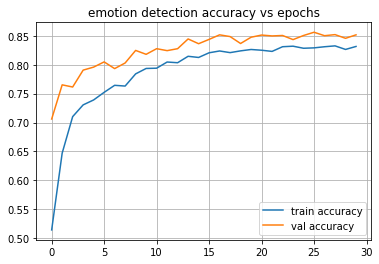

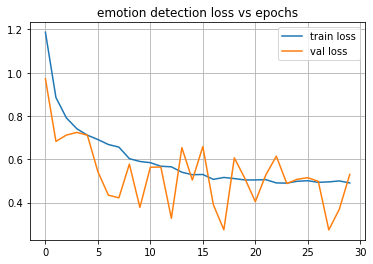

In [35]:
plt.title('emotion detection accuracy vs epochs')
plt.plot([i for i in range(30)], history.history['accuracy'], label='train accuracy')
plt.plot([i for i in range(30)], history.history['val_accuracy'], label='val accuracy')
plt.grid()
plt.legend(loc='best')
plt.show()
plt.clf()

plt.title('emotion detection loss vs epochs')
plt.plot([i for i in range(30)], history.history['loss'], label='train loss')
plt.plot([i for i in range(30)], history.history['val_loss'], label='val loss')
plt.grid()
plt.legend(loc='best')
plt.show()

In [0]:
model.save_weights("./model_emotion.h5")